In [1]:
from utils.data_handling import *
from utils.sensor_optimisation_tsvd import *
from parameters import *
import GPy
import scipy.stats
import time

import matplotlib.pyplot as plt
np.random.seed(101)



### Importing the Tracer Data to Select the Optimisation set S

In [2]:
parameters['field_name'] = "Tracer"
parameters


{'i_start': 0, 'i_end': 988, 'crop': None, 'field_name': 'Tracer'}

In [3]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Tracer.pkl


### Working subset of the data : set S

In [4]:
S_human = human_level_subset(buildingshape, loc_df, 2,1 )
print("The remaining number of points is : ", str(len(S_human)))

The remaining number of points is :  37847


In [5]:
S_working = working_subset(data_df, loc_df, nbins = (25,25,25), threshold_sum = 10**-2 )
print("The remaining number of points is : ", str(len(S_working)))

The remaining number of points is :  57725


In [6]:
S = np.intersect1d(S_human,S_working)
print("The remaining number of points is : ", str(len(S)))

The remaining number of points is :  23643


In [7]:
#A_list = set_to_onehot(S,data_df.shape[0])
#save_vtu(ref_vtu[0],'FinalSelection',A_list)

### Import the Field of interest for computing the optimisation : TracerBackground / Pressure

In [23]:
parameters['i_end'] = 988
parameters['field_name'] = "Pressure"
parameters


{'i_start': 0, 'i_end': 988, 'crop': None, 'field_name': 'Pressure'}

In [24]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded











  0%|          | 0/1 [00:00<?, ?it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0












100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Pressure.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Pressure.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Pressure.pkl


In [25]:
X = loc_df.values[:,:] #[I,:dim]
Z = data_df.values[:,:]#[:,t].reshape(-1,1) # [I,t].reshape(-1,1)
Z.shape

(100040, 989)

### Sensor Optimisation with TSVD : 


Define the Sets for the optimisation

In [26]:
sets = define_sets(S)

Number of sensors to place : 

In [27]:
k = 10

Truncation parameteter for the TSVD : 

In [28]:
tau = 25

In [29]:
A_opt = {}
Delta_y_opt = {}

In [ ]:
start = time.time()
A_opt['lazy_P'], Delta_y_opt['lazy_P'] = sensor_loc_optimisation_lazy(k,Z, sets, tau)
end = time.time()











  0%|          | 0/10 [00:00<?, ?it/s]










Inner Loop:   0%|          | 0/23643 [00:00<?, ?it/s]










Inner Loop:   0%|          | 2/23643 [00:01<3:23:48,  1.93it/s]










Inner Loop:   0%|          | 3/23643 [00:02<4:30:05,  1.46it/s]










Inner Loop:   0%|          | 4/23643 [00:03<5:31:29,  1.19it/s]










Inner Loop:   0%|          | 5/23643 [00:04<6:11:23,  1.06it/s]










Inner Loop:   0%|          | 6/23643 [00:05<6:25:08,  1.02it/s]










Inner Loop:   0%|          | 7/23643 [00:06<7:13:04,  1.10s/it]










Inner Loop:   0%|          | 8/23643 [00:07<6:45:08,  1.03s/it]










Inner Loop:   0%|          | 9/23643 [00:08<6:47:38,  1.03s/it]










Inner Loop:   0%|          | 10/23643 [00:09<6:51:12,  1.04s/it]










Inner Loop:   0%|          | 11/23643 [00:11<7:10:53,  1.09s/it]










Inner Loop:   0%|          | 12/23643 [00:12<7:27:22,  1.14s/it]










Inner Loop:   0%|          | 13/23643 [00:13<7:12:02,  1.10s

Inner Loop:   1%|          | 151/23643 [03:04<8:28:04,  1.30s/it]










Inner Loop:   1%|          | 152/23643 [03:05<8:19:22,  1.28s/it]










Inner Loop:   1%|          | 153/23643 [03:06<7:52:59,  1.21s/it]










Inner Loop:   1%|          | 154/23643 [03:07<7:18:37,  1.12s/it]










Inner Loop:   1%|          | 155/23643 [03:09<8:44:04,  1.34s/it]










Inner Loop:   1%|          | 156/23643 [03:10<7:49:11,  1.20s/it]










Inner Loop:   1%|          | 157/23643 [03:11<8:08:39,  1.25s/it]










Inner Loop:   1%|          | 158/23643 [03:13<8:36:19,  1.32s/it]










Inner Loop:   1%|          | 159/23643 [03:14<8:23:50,  1.29s/it]










Inner Loop:   1%|          | 160/23643 [03:15<8:10:23,  1.25s/it]










Inner Loop:   1%|          | 161/23643 [03:16<7:39:40,  1.17s/it]










Inner Loop:   1%|          | 162/23643 [03:17<7:36:26,  1.17s/it]










Inner Loop:   1%|          | 163/23643 [03:18<7:34:34,  1.16s/it]










Inner Loop: 

Inner Loop:   1%|▏         | 301/23643 [06:09<8:15:26,  1.27s/it]










Inner Loop:   1%|▏         | 302/23643 [06:10<7:51:51,  1.21s/it]










Inner Loop:   1%|▏         | 303/23643 [06:11<8:28:38,  1.31s/it]










Inner Loop:   1%|▏         | 304/23643 [06:13<8:45:53,  1.35s/it]










Inner Loop:   1%|▏         | 305/23643 [06:14<8:24:54,  1.30s/it]










Inner Loop:   1%|▏         | 306/23643 [06:15<7:59:03,  1.23s/it]










Inner Loop:   1%|▏         | 307/23643 [06:16<7:38:23,  1.18s/it]










Inner Loop:   1%|▏         | 308/23643 [06:18<7:58:21,  1.23s/it]










Inner Loop:   1%|▏         | 309/23643 [06:19<7:44:13,  1.19s/it]










Inner Loop:   1%|▏         | 310/23643 [06:20<7:54:31,  1.22s/it]










Inner Loop:   1%|▏         | 311/23643 [06:21<7:55:29,  1.22s/it]










Inner Loop:   1%|▏         | 312/23643 [06:22<7:38:19,  1.18s/it]










Inner Loop:   1%|▏         | 313/23643 [06:23<7:10:42,  1.11s/it]










Inner Loop: 

Inner Loop:   2%|▏         | 451/23643 [09:16<7:52:52,  1.22s/it]










Inner Loop:   2%|▏         | 452/23643 [09:18<8:01:54,  1.25s/it]










Inner Loop:   2%|▏         | 453/23643 [09:19<7:15:49,  1.13s/it]










Inner Loop:   2%|▏         | 454/23643 [09:20<6:58:40,  1.08s/it]










Inner Loop:   2%|▏         | 455/23643 [09:21<7:09:32,  1.11s/it]










Inner Loop:   2%|▏         | 456/23643 [09:22<7:12:12,  1.12s/it]










Inner Loop:   2%|▏         | 457/23643 [09:23<7:05:46,  1.10s/it]










Inner Loop:   2%|▏         | 458/23643 [09:24<6:26:25,  1.00s/it]










Inner Loop:   2%|▏         | 459/23643 [09:25<6:50:48,  1.06s/it]










Inner Loop:   2%|▏         | 460/23643 [09:26<6:49:50,  1.06s/it]










Inner Loop:   2%|▏         | 461/23643 [09:27<7:38:31,  1.19s/it]










Inner Loop:   2%|▏         | 462/23643 [09:29<7:52:19,  1.22s/it]










Inner Loop:   2%|▏         | 463/23643 [09:30<7:52:29,  1.22s/it]










Inner Loop: 

Inner Loop:   3%|▎         | 601/23643 [12:19<6:44:34,  1.05s/it]










Inner Loop:   3%|▎         | 602/23643 [12:20<6:33:30,  1.02s/it]










Inner Loop:   3%|▎         | 603/23643 [12:22<7:41:14,  1.20s/it]










Inner Loop:   3%|▎         | 604/23643 [12:24<8:26:40,  1.32s/it]










Inner Loop:   3%|▎         | 605/23643 [12:25<7:55:07,  1.24s/it]










Inner Loop:   3%|▎         | 606/23643 [12:26<7:55:39,  1.24s/it]










Inner Loop:   3%|▎         | 607/23643 [12:27<8:05:14,  1.26s/it]










Inner Loop:   3%|▎         | 608/23643 [12:28<7:59:25,  1.25s/it]










Inner Loop:   3%|▎         | 609/23643 [12:29<7:22:44,  1.15s/it]










Inner Loop:   3%|▎         | 610/23643 [12:31<7:40:16,  1.20s/it]










Inner Loop:   3%|▎         | 611/23643 [12:32<7:08:32,  1.12s/it]










Inner Loop:   3%|▎         | 612/23643 [12:33<7:28:36,  1.17s/it]










Inner Loop:   3%|▎         | 613/23643 [12:34<7:34:58,  1.19s/it]










Inner Loop: 

In [ ]:
A_opt['lazy_P']

In [18]:
Delta_y_opt['lazy_P'] 

{14276: array([[-3418.38951431]]),
 60296: array([[-451.30747149]]),
 91348: array([[-308.96033407]]),
 5338: array([[-121.00634182]]),
 40994: array([[-73.9633521]]),
 29626: array([[-57.65863431]]),
 65851: array([[-53.04335018]]),
 65734: array([[-47.06825598]]),
 23083: array([[-45.03319239]]),
 851: array([[-38.99485124]])}

Text(0.5, 0, 'Sensor Placed')

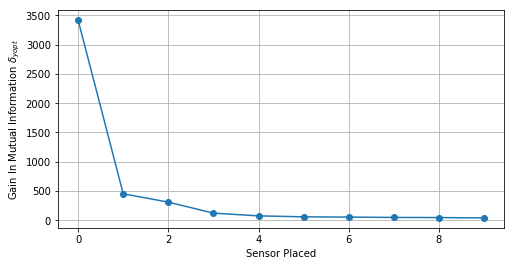

In [21]:
plt.figure(figsize=(8,4))
plt.plot(-np.array(list(Delta_y_opt['lazy']  .values())).flatten(),'-o')

plt.grid()
plt.ylabel("Gain In Mutual Information $\delta_{yopt}$")
plt.xlabel("Sensor Placed")

In [30]:
print(loc_df.loc[A_opt['lazy'] ,:].T.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  38726 &  14276 &  91348 &  5338  &  40994 &  29626 &  65851 &  65734 &  851   &  2293  \\
\midrule
X & -50.50 &  35.63 &  43.05 & 137.58 &  80.34 &  27.79 &  49.54 &  54.59 &  77.54 &  62.03 \\
Y &  48.85 &  58.69 &  27.51 &  55.78 &  76.20 &  26.24 &  28.88 &  25.42 &  34.82 &  41.92 \\
Z &  14.84 &   0.20 &   7.76 &   0.20 &   0.20 &  12.06 &  17.65 &   3.80 &   0.20 &   0.20 \\
\bottomrule
\end{tabular}



In [22]:
end - start 

26968.1893491745

In [28]:
A_list = set_to_onehot(A_opt['lazy'] ,data_df.shape[0])
save_vtu(ref_vtu[0],'Opt_TSVD_full_tau25',A_list)

==> Saved to : ../data/temp_data/LSBU_res_2019:08:15-09:49:23_Opt_TSVD_full_tau25.vtu


In [37]:
np.savetxt('Optimal Points/localpoints_TSVD25',A_opt['lazy'])